In [20]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


# Loading dataset

In [3]:
# loading dataset
file_path = 'C:/Users/twish/00_initiative/000_Research Paper/Global_Education.csv'
data = pd.read_csv(file_path, encoding='latin1')

In [4]:
# displaying first few frames 
data.head()

,Countries and areas,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
0,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,44,...,13,11,0,0,74,56,32.49,104.0,9.7,11.12
1,Albania,41.153332,20.168331,4,2,6,3,6,1,21,...,0,0,48,58,99,100,11.78,107.0,55.0,12.33
2,Algeria,28.033886,1.659626,0,0,0,0,0,0,0,...,0,0,21,19,98,97,24.28,109.9,51.4,11.70
3,Andorra,42.506285,1.521801,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7.20,106.4,0.0,0.00
4,Angola,11.202692,17.873887,31,39,0,0,0,0,0,...,0,0,0,0,0,0,40.73,113.5,9.3,6.89


The “World Education Data” dataset offers a comprehensive global view of education. It covers essential metrics like out-of-school rates, completion rates, proficiency levels, literacy rates, birth rates, and enrollment in primary and tertiary education. These metrics help us to draw valuable insights from the dataset. 

# Identifying Missing Values

In [5]:
data.isnull().sum()

Countries and areas                        0
Latitude                                   0
Longitude                                  0
OOSR_Pre0Primary_Age_Male                  0
OOSR_Pre0Primary_Age_Female                0
OOSR_Primary_Age_Male                      0
OOSR_Primary_Age_Female                    0
OOSR_Lower_Secondary_Age_Male              0
OOSR_Lower_Secondary_Age_Female            0
OOSR_Upper_Secondary_Age_Male              0
OOSR_Upper_Secondary_Age_Female            0
Completion_Rate_Primary_Male               0
Completion_Rate_Primary_Female             0
Completion_Rate_Lower_Secondary_Male       0
Completion_Rate_Lower_Secondary_Female     0
Completion_Rate_Upper_Secondary_Male       0
Completion_Rate_Upper_Secondary_Female     0
Grade_2_3_Proficiency_Reading              0
Grade_2_3_Proficiency_Math                 0
Primary_End_Proficiency_Reading            0
Primary_End_Proficiency_Math               0
Lower_Secondary_End_Proficiency_Reading    0
Lower_Seco

In [6]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
Latitude,1.000000,-0.296737,-0.251144,-0.232117,-0.256220,-0.265878,-0.314519,-0.297764,-0.328922,-0.319757,...,0.169082,0.201129,0.639275,0.674029,-0.145076,-0.134280,-0.509112,0.006552,0.578970,0.080760
Longitude,-0.296737,1.000000,-0.099692,-0.105877,-0.142288,-0.144630,-0.077958,-0.118649,0.024929,-0.049288,...,-0.029954,-0.019363,-0.128971,-0.145667,-0.008159,0.008052,-0.163862,-0.118375,-0.092477,-0.278258
OOSR_Pre0Primary_Age_Male,-0.251144,-0.099692,1.000000,0.984145,0.541979,0.578650,0.534625,0.533876,0.475048,0.476920,...,-0.097947,-0.115318,-0.359043,-0.358424,0.002011,-0.012017,0.451898,-0.083844,-0.362917,0.130623
OOSR_Pre0Primary_Age_Female,-0.232117,-0.105877,0.984145,1.000000,0.537058,0.582072,0.531879,0.539081,0.456563,0.467279,...,-0.101869,-0.108964,-0.344785,-0.346009,0.008926,-0.006110,0.469859,-0.049785,-0.336194,0.132268
OOSR_Primary_Age_Male,-0.256220,-0.142288,0.541979,0.537058,1.000000,0.964160,0.560956,0.572686,0.406544,0.419825,...,-0.050654,-0.073999,-0.258051,-0.265992,0.018375,0.005537,0.388390,-0.179302,-0.293258,0.074100
OOSR_Primary_Age_Female,-0.265878,-0.144630,0.578650,0.582072,0.964160,1.000000,0.660776,0.698991,0.483657,0.517142,...,-0.065103,-0.089894,-0.264240,-0.271403,0.034565,0.014447,0.413471,-0.184440,-0.299394,0.048978
OOSR_Lower_Secondary_Age_Male,-0.314519,-0.077958,0.534625,0.531879,0.560956,0.660776,1.000000,0.966085,0.807592,0.808483,...,-0.071948,-0.071277,-0.310789,-0.329829,0.034276,0.006352,0.438541,-0.036796,-0.331477,-0.030075
OOSR_Lower_Secondary_Age_Female,-0.297764,-0.118649,0.533876,0.539081,0.572686,0.698991,0.966085,1.000000,0.772854,0.812555,...,-0.073749,-0.083238,-0.302235,-0.318292,0.007934,-0.025590,0.465821,-0.035797,-0.328637,-0.042566
OOSR_Upper_Secondary_Age_Male,-0.328922,0.024929,0.475048,0.456563,0.406544,0.483657,0.807592,0.772854,1.000000,0.965080,...,-0.083403,-0.054080,-0.359459,-0.377139,0.128415,0.108487,0.378810,-0.030308,-0.378626,-0.103774
OOSR_Upper_Secondary_Age_Female,-0.319757,-0.049288,0.476920,0.467279,0.419825,0.517142,0.808483,0.812555,0.965080,1.000000,...,-0.075684,-0.069173,-0.358775,-0.375763,0.100055,0.073178,0.443845,0.002852,-0.382639,-0.104612


No missing values found 

# Using IQR to identify outliers 

In [12]:
# Calculate the IQR for each numerical column
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

In [13]:
# Identify outliers
outliers = ((data[numerical_columns] < (Q1 - 3 * IQR)) | (data[numerical_columns] > (Q3 + 3 * IQR))).any(axis=1)
data_cleaned = data[~outliers]

In [15]:
# Check for any remaining missing values
data_cleaned.isnull().sum().sum()



0

In [17]:
# Calculate the percentage of zero values in each column
zero_value_percentage = (data == 0).mean() * 100

display(zero_value_percentage)


Countries and areas                         0.000000
Latitude                                    0.000000
Longitude                                   0.000000
OOSR_Pre0Primary_Age_Male                  25.742574
OOSR_Pre0Primary_Age_Female                27.227723
OOSR_Primary_Age_Male                      39.603960
OOSR_Primary_Age_Female                    42.079208
OOSR_Lower_Secondary_Age_Male              36.633663
OOSR_Lower_Secondary_Age_Female            37.128713
OOSR_Upper_Secondary_Age_Male              25.247525
OOSR_Upper_Secondary_Age_Female            25.247525
Completion_Rate_Primary_Male               47.029703
Completion_Rate_Primary_Female             47.029703
Completion_Rate_Lower_Secondary_Male       47.029703
Completion_Rate_Lower_Secondary_Female     47.029703
Completion_Rate_Upper_Secondary_Male       47.029703
Completion_Rate_Upper_Secondary_Female     47.029703
Grade_2_3_Proficiency_Reading              64.851485
Grade_2_3_Proficiency_Math                 70.

In [18]:
# Step 1: Remove columns with more than 75% zero values
columns_to_drop = zero_value_percentage[zero_value_percentage > 75].index
filtered_data = data.drop(columns=columns_to_drop)

# Step 2: Filter countries with non-zero literacy rates
filtered_data = filtered_data[(filtered_data['Youth_15_24_Literacy_Rate_Male'] > 0) & (filtered_data['Youth_15_24_Literacy_Rate_Female'] > 0)]

display(filtered_data.head())


,Countries and areas,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,...,Grade_2_3_Proficiency_Reading,Grade_2_3_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
0,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,44,...,22,25,0,0,74,56,32.49,104.0,9.7,11.12
1,Albania,41.153332,20.168331,4,2,6,3,6,1,21,...,0,0,48,58,99,100,11.78,107.0,55.0,12.33
2,Algeria,28.033886,1.659626,0,0,0,0,0,0,0,...,0,0,21,19,98,97,24.28,109.9,51.4,11.70
7,Argentina,38.416097,63.616672,2,2,0,0,0,0,15,...,76,71,48,31,99,100,17.02,109.7,90.0,9.79
13,Bahrain,26.066700,50.557700,31,28,2,3,7,0,18,...,69,40,0,39,100,99,13.99,99.4,50.5,0.71


In [16]:
# Verify the cleaned data
data_cleaned.describe()


,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,...,118.0,118.0,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,26.423872,57.031060,15.305085,15.211864,3.042373,2.830508,4.949153,4.618644,14.525424,13.762712,...,0.0,0.0,28.254237,27.915254,34.779661,34.601695,18.470085,103.213559,39.077119,6.060169
std,17.493323,46.802667,22.045605,21.911575,4.763454,4.659895,7.178848,7.099921,16.531613,16.797272,...,0.0,0.0,34.972073,34.131615,46.463318,46.469021,9.075761,8.023863,30.220671,5.032920
min,0.023559,1.023194,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,6.400000,81.400000,0.000000,0.000000
25%,11.881937,19.202450,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,10.612500,99.425000,11.925000,2.512500
50%,24.460111,46.280464,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,7.000000,6.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,16.610000,102.500000,33.050000,4.500000
75%,40.791334,80.024140,20.500000,19.000000,3.750000,3.000000,8.000000,7.000000,23.000000,22.000000,...,0.0,0.0,62.750000,62.000000,98.000000,97.750000,24.295000,107.375000,63.900000,8.860000
max,64.963051,178.065032,96.000000,96.000000,22.000000,21.000000,29.000000,34.000000,84.000000,88.000000,...,0.0,0.0,89.000000,94.000000,100.000000,100.000000,41.180000,133.000000,136.600000,23.410000


# EDA

# # Association Rule, Apriori Algorithms 

In [21]:
# Binarize the relevant columns
relevant_columns = ['Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female', 
                    'Birth_Rate', 'Gross_Primary_Education_Enrollment', 'Gross_Tertiary_Education_Enrollment', 
                    'Unemployment_Rate']

binarized_data = filtered_data[relevant_columns].apply(lambda x: pd.cut(x, bins=3, labels=["Low", "Medium", "High"]))
binarized_data = pd.get_dummies(binarized_data)

# Helper function to calculate support
def calculate_support(itemset, data):
    return (data[list(itemset)].all(axis=1).mean())

# Generate frequent itemsets
min_support = 0.1
frequent_itemsets = []
columns = binarized_data.columns

# Generate 1-itemsets
for col in columns:
    support = calculate_support([col], binarized_data)
    if support >= min_support:
        frequent_itemsets.append((frozenset([col]), support))

# Generate 2-itemsets and higher
k = 2
while True:
    candidate_itemsets = [a.union(b) for a, b in combinations([item for item, support in frequent_itemsets if len(item) == k-1], 2) if len(a.union(b)) == k]
    candidate_itemsets = set(candidate_itemsets)
    itemsets_with_support = [(item, calculate_support(item, binarized_data)) for item in candidate_itemsets]
    itemsets_with_support = [item for item in itemsets_with_support if item[1] >= min_support]
    if not itemsets_with_support:
        break
    frequent_itemsets.extend(itemsets_with_support)
    k += 1

# Convert frequent itemsets to a DataFrame
frequent_itemsets_df = pd.DataFrame(frequent_itemsets, columns=['Itemset', 'Support'])

# Generate association rules
min_lift = 1.0
rules = []

for itemset, support in frequent_itemsets:
    if len(itemset) > 1:
        for antecedent in combinations(itemset, len(itemset) - 1):
            antecedent = frozenset(antecedent)
            consequent = itemset - antecedent
            antecedent_support = calculate_support(antecedent, binarized_data)
            consequent_support = calculate_support(consequent, binarized_data)
            confidence = support / antecedent_support
            lift = confidence / consequent_support
            if lift >= min_lift:
                rules.append((antecedent, consequent, support, antecedent_support, consequent_support, confidence, lift))

rules_df = pd.DataFrame(rules, columns=['Antecedent', 'Consequent', 'Support', 'Antecedent Support', 'Consequent Support', 'Confidence', 'Lift'])

display(rules_df.head())


,Antecedent,Consequent,Support,Antecedent Support,Consequent Support,Confidence,Lift
0,(Birth_Rate_Medium),(Gross_Primary_Education_Enrollment_High),0.354430,0.417722,0.810127,0.848485,1.047348
1,(Gross_Primary_Education_Enrollment_High),(Birth_Rate_Medium),0.354430,0.810127,0.417722,0.437500,1.047348
2,(Gross_Tertiary_Education_Enrollment_Medium),(Youth_15_24_Literacy_Rate_Male_High),0.316456,0.316456,0.810127,1.000000,1.234375
3,(Youth_15_24_Literacy_Rate_Male_High),(Gross_Tertiary_Education_Enrollment_Medium),0.316456,0.810127,0.316456,0.390625,1.234375
4,(Youth_15_24_Literacy_Rate_Male_High),(Unemployment_Rate_Low),0.544304,0.810127,0.670886,0.671875,1.001474


## PCA and t-SNE analysis

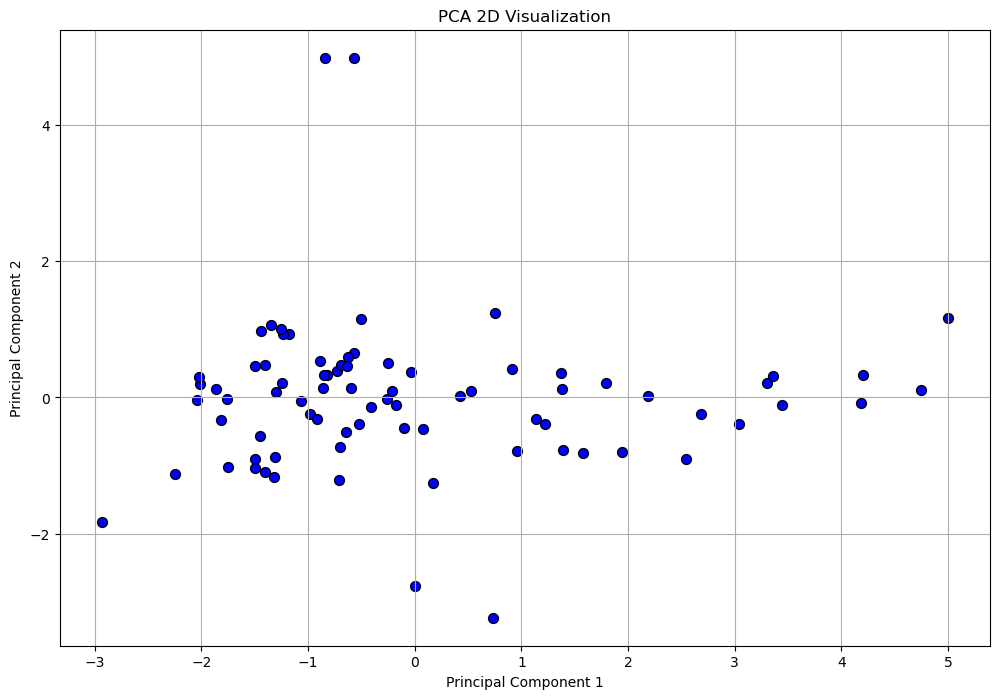

In [23]:
# Select relevant features for dimensionality reduction
features = filtered_data[['Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female', 
                          'Birth_Rate', 'Gross_Primary_Education_Enrollment', 
                          'Gross_Tertiary_Education_Enrollment', 'Unemployment_Rate']]

# Normalize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA
pca_2d = PCA(n_components=2)
pca_3d = PCA(n_components=3)
pca_2d_result = pca_2d.fit_transform(features_scaled)
pca_3d_result = pca_3d.fit_transform(features_scaled)

# Plot PCA 2D
plt.figure(figsize=(12, 8))
plt.scatter(pca_2d_result[:, 0], pca_2d_result[:, 1], c='blue', edgecolor='k', s=50)
plt.title('PCA 2D Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


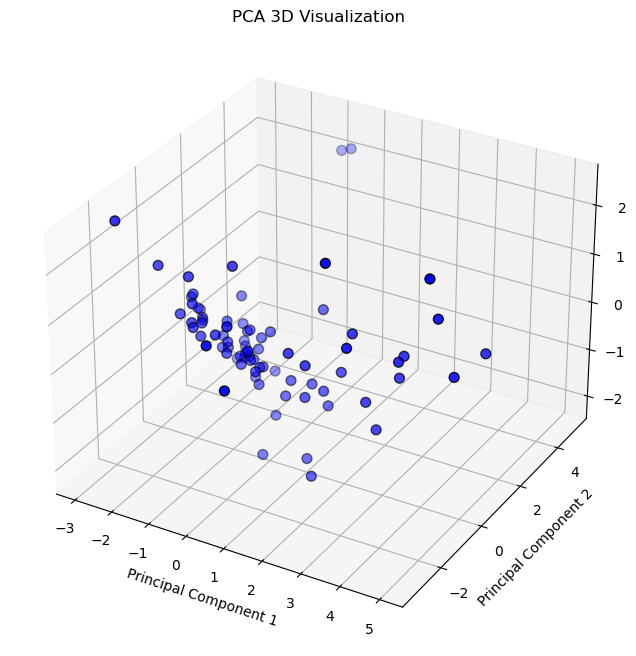

In [24]:

# Plot PCA 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_3d_result[:, 0], pca_3d_result[:, 1], pca_3d_result[:, 2], c='blue', edgecolor='k', s=50)
ax.set_title('PCA 3D Visualization')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()



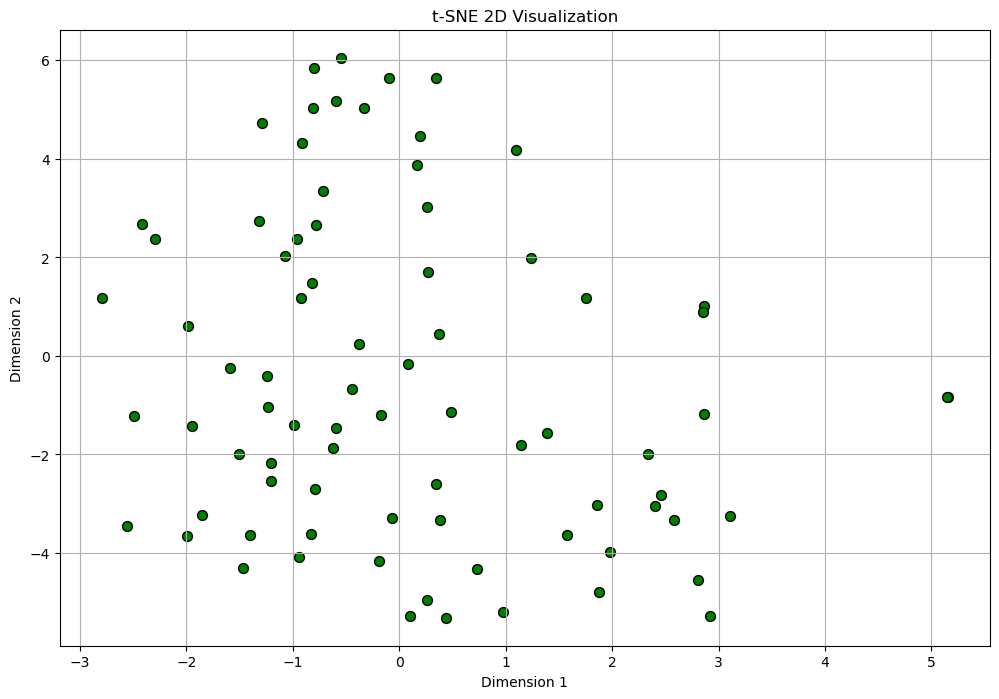

In [25]:
# Apply t-SNE
tsne_2d = TSNE(n_components=2, random_state=42)
tsne_3d = TSNE(n_components=3, random_state=42)

tsne_2d_result = tsne_2d.fit_transform(features_scaled)
tsne_3d_result = tsne_3d.fit_transform(features_scaled)

# Plot t-SNE 2D
plt.figure(figsize=(12, 8))
plt.scatter(tsne_2d_result[:, 0], tsne_2d_result[:, 1], c='green', edgecolor='k', s=50)
plt.title('t-SNE 2D Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()


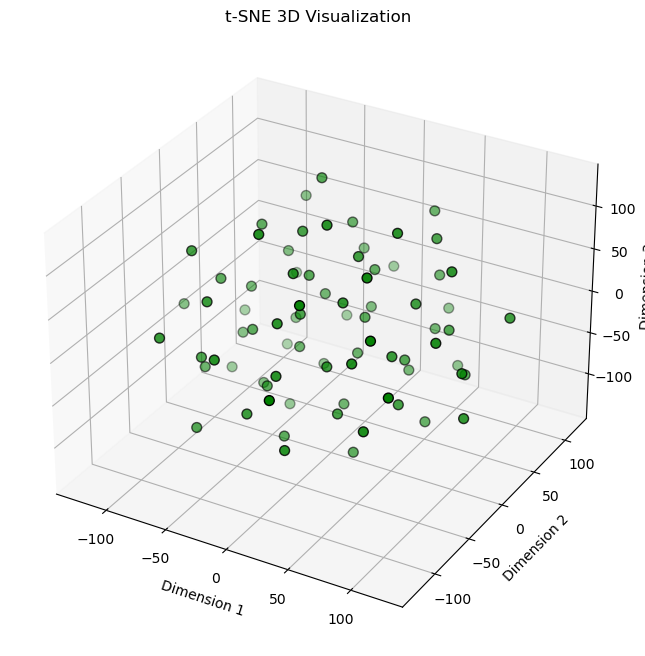

In [26]:
# Plot t-SNE 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_3d_result[:, 0], tsne_3d_result[:, 1], tsne_3d_result[:, 2], c='green', edgecolor='k', s=50)
ax.set_title('t-SNE 3D Visualization')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.show()


# Model Training

## K-Means Clustering

C:\Users\twish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\twish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


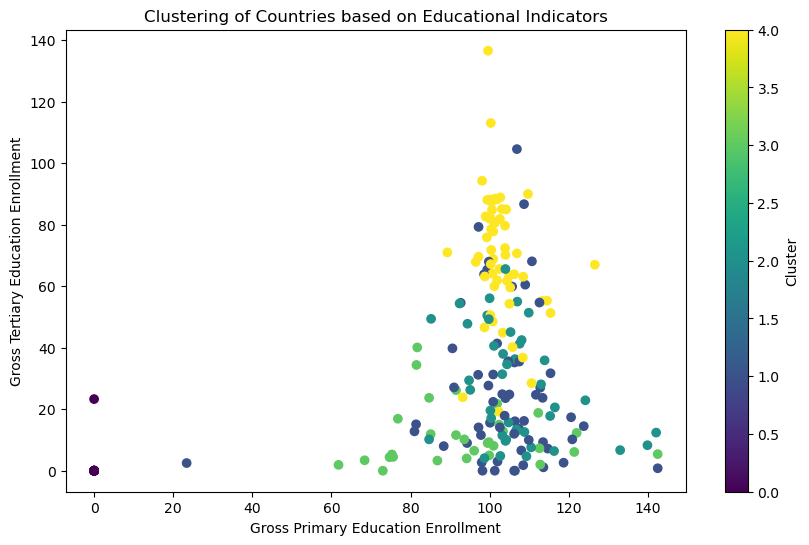

In [28]:
# Selecting relevant columns for clustering
columns_to_cluster = [
    'OOSR_Pre0Primary_Age_Male', 'OOSR_Pre0Primary_Age_Female',
    'OOSR_Primary_Age_Male', 'OOSR_Primary_Age_Female',
    'OOSR_Lower_Secondary_Age_Male', 'OOSR_Lower_Secondary_Age_Female',
    'OOSR_Upper_Secondary_Age_Male', 'OOSR_Upper_Secondary_Age_Female',
    'Primary_End_Proficiency_Reading', 'Primary_End_Proficiency_Math',
    'Lower_Secondary_End_Proficiency_Reading', 'Lower_Secondary_End_Proficiency_Math',
    'Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female',
    'Birth_Rate', 'Gross_Primary_Education_Enrollment',
    'Gross_Tertiary_Education_Enrollment', 'Unemployment_Rate'
]

# Preprocessing: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[columns_to_cluster].fillna(0))

# Applying K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=0)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Gross_Primary_Education_Enrollment'], data['Gross_Tertiary_Education_Enrollment'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Gross Primary Education Enrollment')
plt.ylabel('Gross Tertiary Education Enrollment')
plt.title('Clustering of Countries based on Educational Indicators')
plt.colorbar(label='Cluster')
plt.show()


In [30]:
# Creating a mapping of cluster labels to colors
cluster_color_mapping = {0: 'purple', 1: 'green', 2: 'yellow', 3: 'blue', 4: 'teal'}

# Adding the color information to the dataframe
data['Cluster_Color'] = data['Cluster'].map(cluster_color_mapping)

# Creating a list of countries with their associated cluster color
country_cluster_color = data[['Countries and areas', 'Cluster_Color']]

# Save to CSV or display
country_cluster_color.to_csv('country_cluster_color_mapping.csv', index=False)
print(country_cluster_color)


    Countries and areas Cluster_Color
0           Afghanistan        yellow
1               Albania        yellow
2               Algeria        yellow
3               Andorra         green
4                Angola         green
..                  ...           ...
197           Venezuela         green
198             Vietnam          teal
199               Yemen          blue
200              Zambia        yellow
201            Zimbabwe         green

[202 rows x 2 columns]


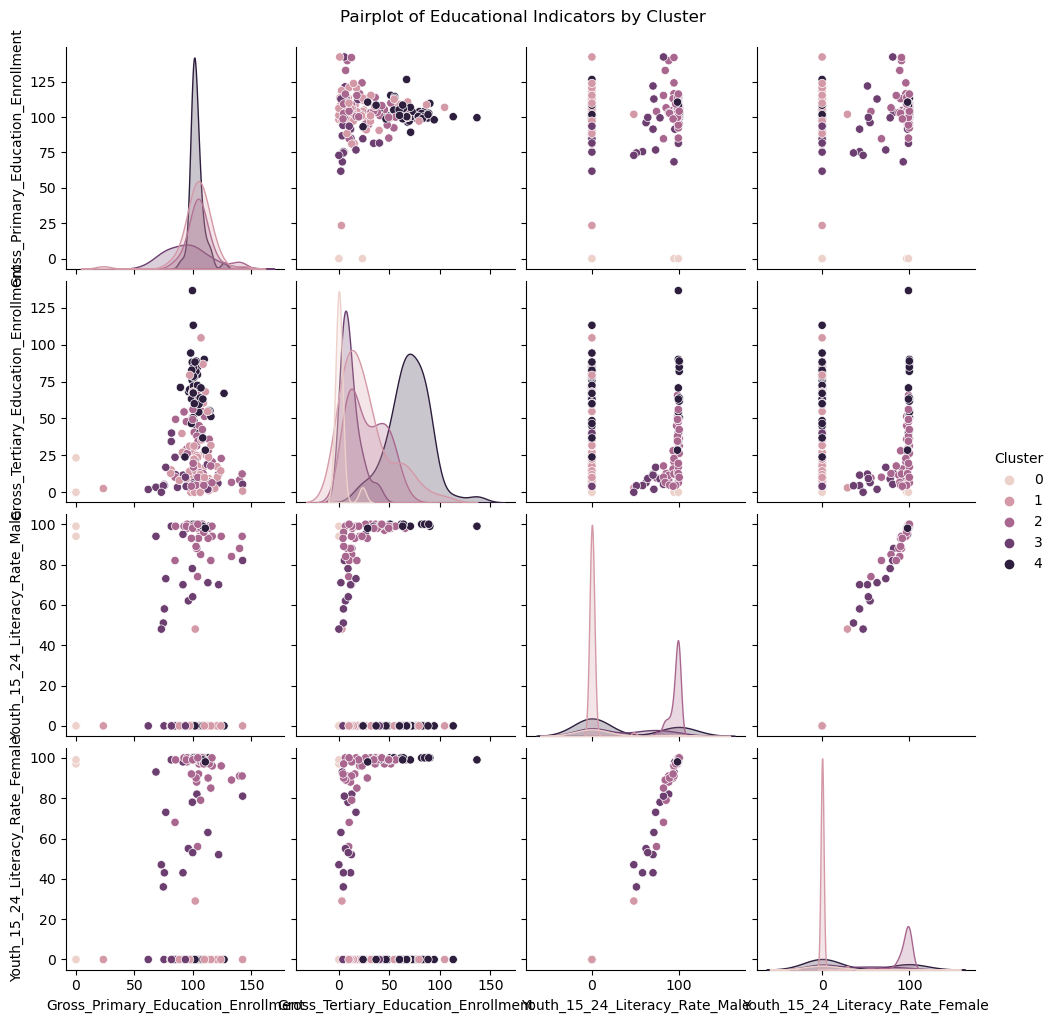

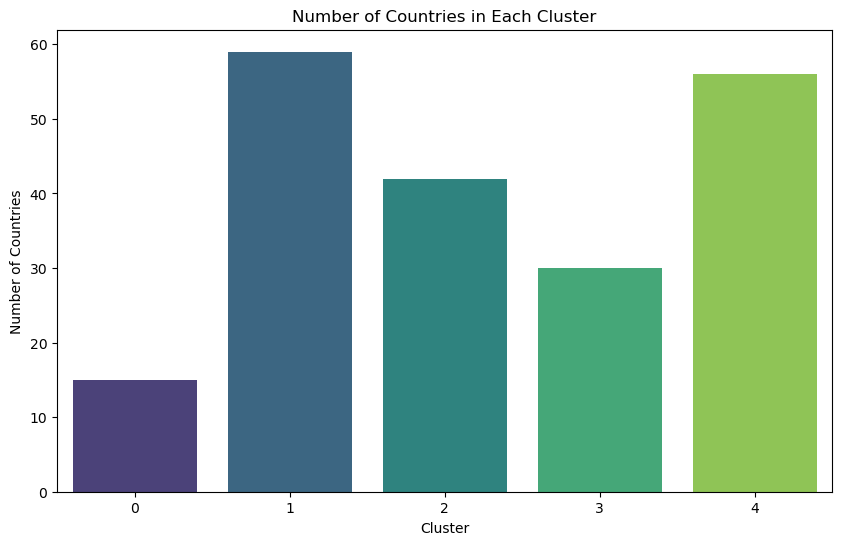

In [31]:
# Pairplot for clusters
sns.pairplot(data, hue='Cluster', vars=['Gross_Primary_Education_Enrollment', 'Gross_Tertiary_Education_Enrollment', 'Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female'])
plt.suptitle('Pairplot of Educational Indicators by Cluster', y=1.02)
plt.show()



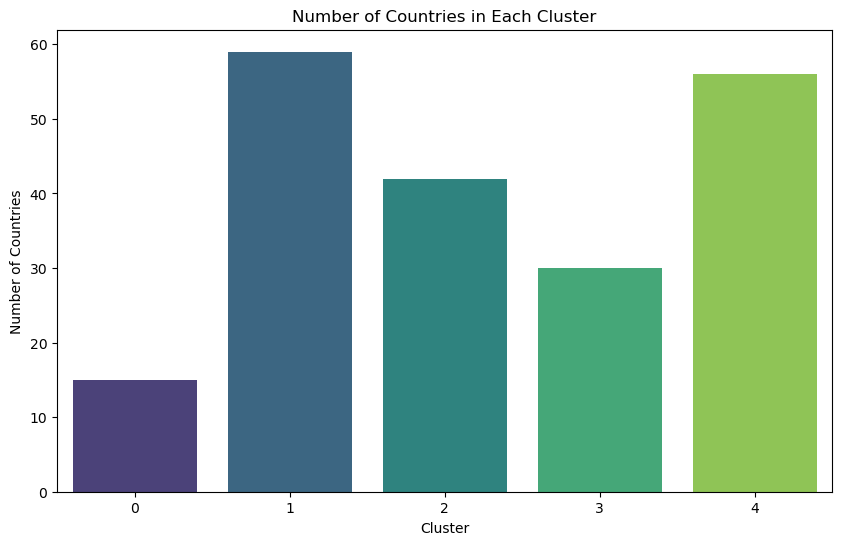

In [32]:
# Bar plot for cluster sizes
cluster_counts = data['Cluster'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Number of Countries')
plt.title('Number of Countries in Each Cluster')
plt.show()


## predictive regression model

In [33]:
num_cols=data.select_dtypes(include=['int','float'])
num_cols.corr()

,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,...,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate,Cluster
Latitude,1.000000,-0.296737,-0.251144,-0.232117,-0.256220,-0.265878,-0.314519,-0.297764,-0.328922,-0.319757,...,0.201129,0.639275,0.674029,-0.145076,-0.134280,-0.509112,0.006552,0.578970,0.080760,0.386685
Longitude,-0.296737,1.000000,-0.099692,-0.105877,-0.142288,-0.144630,-0.077958,-0.118649,0.024929,-0.049288,...,-0.019363,-0.128971,-0.145667,-0.008159,0.008052,-0.163862,-0.118375,-0.092477,-0.278258,-0.220118
OOSR_Pre0Primary_Age_Male,-0.251144,-0.099692,1.000000,0.984145,0.541979,0.578650,0.534625,0.533876,0.475048,0.476920,...,-0.115318,-0.359043,-0.358424,0.002011,-0.012017,0.451898,-0.083844,-0.362917,0.130623,-0.084378
OOSR_Pre0Primary_Age_Female,-0.232117,-0.105877,0.984145,1.000000,0.537058,0.582072,0.531879,0.539081,0.456563,0.467279,...,-0.108964,-0.344785,-0.346009,0.008926,-0.006110,0.469859,-0.049785,-0.336194,0.132268,-0.061509
OOSR_Primary_Age_Male,-0.256220,-0.142288,0.541979,0.537058,1.000000,0.964160,0.560956,0.572686,0.406544,0.419825,...,-0.073999,-0.258051,-0.265992,0.018375,0.005537,0.388390,-0.179302,-0.293258,0.074100,0.070528
OOSR_Primary_Age_Female,-0.265878,-0.144630,0.578650,0.582072,0.964160,1.000000,0.660776,0.698991,0.483657,0.517142,...,-0.089894,-0.264240,-0.271403,0.034565,0.014447,0.413471,-0.184440,-0.299394,0.048978,0.096370
OOSR_Lower_Secondary_Age_Male,-0.314519,-0.077958,0.534625,0.531879,0.560956,0.660776,1.000000,0.966085,0.807592,0.808483,...,-0.071277,-0.310789,-0.329829,0.034276,0.006352,0.438541,-0.036796,-0.331477,-0.030075,0.097554
OOSR_Lower_Secondary_Age_Female,-0.297764,-0.118649,0.533876,0.539081,0.572686,0.698991,0.966085,1.000000,0.772854,0.812555,...,-0.083238,-0.302235,-0.318292,0.007934,-0.025590,0.465821,-0.035797,-0.328637,-0.042566,0.112975
OOSR_Upper_Secondary_Age_Male,-0.328922,0.024929,0.475048,0.456563,0.406544,0.483657,0.807592,0.772854,1.000000,0.965080,...,-0.054080,-0.359459,-0.377139,0.128415,0.108487,0.378810,-0.030308,-0.378626,-0.103774,0.017068
OOSR_Upper_Secondary_Age_Female,-0.319757,-0.049288,0.476920,0.467279,0.419825,0.517142,0.808483,0.812555,0.965080,1.000000,...,-0.069173,-0.358775,-0.375763,0.100055,0.073178,0.443845,0.002852,-0.382639,-0.104612,0.045732


In [34]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Extract correlations of all features with the target variable 'Completion_Rate_Upper_Secondary_Male'
target_correlations = correlation_matrix['Completion_Rate_Upper_Secondary_Male'].sort_values(ascending=False)

# Display the correlations
target_correlations

C:\Users\twish\AppData\Local\Temp\ipykernel_26900\192329589.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


Completion_Rate_Upper_Secondary_Male       1.000000
Completion_Rate_Upper_Secondary_Female     0.980652
Completion_Rate_Lower_Secondary_Male       0.950924
Completion_Rate_Lower_Secondary_Female     0.939773
Completion_Rate_Primary_Male               0.882676
Completion_Rate_Primary_Female             0.872965
Unemployment_Rate                          0.267683
Primary_End_Proficiency_Math               0.182502
Youth_15_24_Literacy_Rate_Female           0.174375
Youth_15_24_Literacy_Rate_Male             0.171520
Primary_End_Proficiency_Reading            0.093929
Birth_Rate                                 0.075624
Gross_Primary_Education_Enrollment         0.070049
Longitude                                  0.033484
Grade_2_3_Proficiency_Reading              0.020013
OOSR_Pre0Primary_Age_Female                0.017676
OOSR_Pre0Primary_Age_Male                  0.011164
Gross_Tertiary_Education_Enrollment        0.004151
OOSR_Upper_Secondary_Age_Male             -0.001775
Latitude    

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [36]:
# Selecting features based on correlation analysis
features = [
    'Completion_Rate_Lower_Secondary_Male', 'Completion_Rate_Primary_Male',
    'Youth_15_24_Literacy_Rate_Male', 'Primary_End_Proficiency_Math'
]

# Target variable
target = 'Completion_Rate_Upper_Secondary_Male'

# Preparing the data
X = data[features]
y = data[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
rf_model.fit(X_train, y_train)

# Making predictions
y_pred = rf_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(147.37386630284553, 0.834820996629495)

In [38]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [39]:
# Prepare your data: Select features and the target variable
features = [
    'Completion_Rate_Lower_Secondary_Male', 'Completion_Rate_Primary_Male',
    'Youth_15_24_Literacy_Rate_Male', 'Primary_End_Proficiency_Math'
]
target = 'Completion_Rate_Upper_Secondary_Male'

X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up the GridSearchCV object
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           verbose=2,
                           n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score (MSE)
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Convert back to positive as the scoring was negative MSE
print("Best parameters:", best_params)
print("Best MSE:", best_score)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test MSE:", mse)
print("Test R-squared:", r2)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Best MSE: 72.98973970621009
Test MSE: 148.78473355749844
Test R-squared: 0.8332396738830812


                                Feature  Importance
0  Completion_Rate_Lower_Secondary_Male    0.957929
1          Completion_Rate_Primary_Male    0.032798
2        Youth_15_24_Literacy_Rate_Male    0.008060
3          Primary_End_Proficiency_Math    0.001213


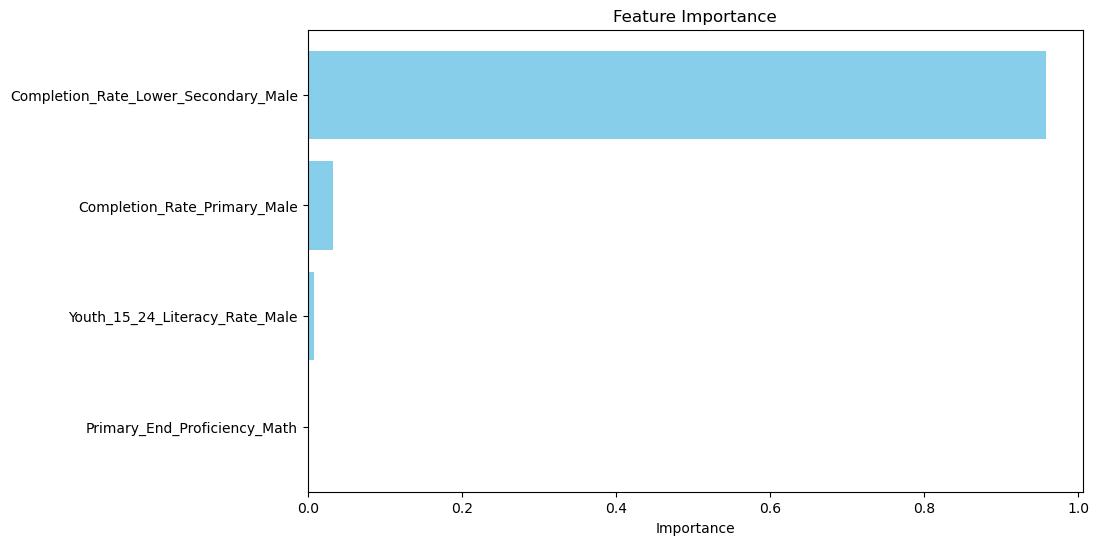

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'best_model' is your trained Random Forest model and 'X_train' contains your feature names
feature_importances = best_model.feature_importances_

# Create a DataFrame to hold feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importance_df)

# Optionally, plot the feature importances for better visualization
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to have the most important at the top
plt.show()


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score



# Select features
features_tertiary = [
    'Completion_Rate_Upper_Secondary_Male', 'Completion_Rate_Upper_Secondary_Female',
    'Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female',
    'Gross_Primary_Education_Enrollment'
]

# Define the target variable
target_tertiary = 'Gross_Tertiary_Education_Enrollment'

# Prepare the data
X_tertiary = data[features_tertiary]
y_tertiary = data[target_tertiary]

# Split the data into training and testing sets
X_train_tertiary, X_test_tertiary, y_train_tertiary, y_test_tertiary = train_test_split(X_tertiary, y_tertiary, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model_tertiary = RandomForestRegressor(n_estimators=100, min_samples_split=10, random_state=42)
rf_model_tertiary.fit(X_train_tertiary, y_train_tertiary)

# Make predictions
y_pred_tertiary = rf_model_tertiary.predict(X_test_tertiary)

# Evaluate the model
mse_tertiary = mean_squared_error(y_test_tertiary, y_pred_tertiary)
r2_tertiary = r2_score(y_test_tertiary, y_pred_tertiary)

print("MSE:", mse_tertiary)
print("R-squared:", r2_tertiary)


MSE: 615.3351193135464
R-squared: 0.320595661204337


In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

gbm = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters:", best_params)
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("Best MSE:", mse_best)
print("Best R-squared:", r2_best)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.05, max_depth=4, n_es

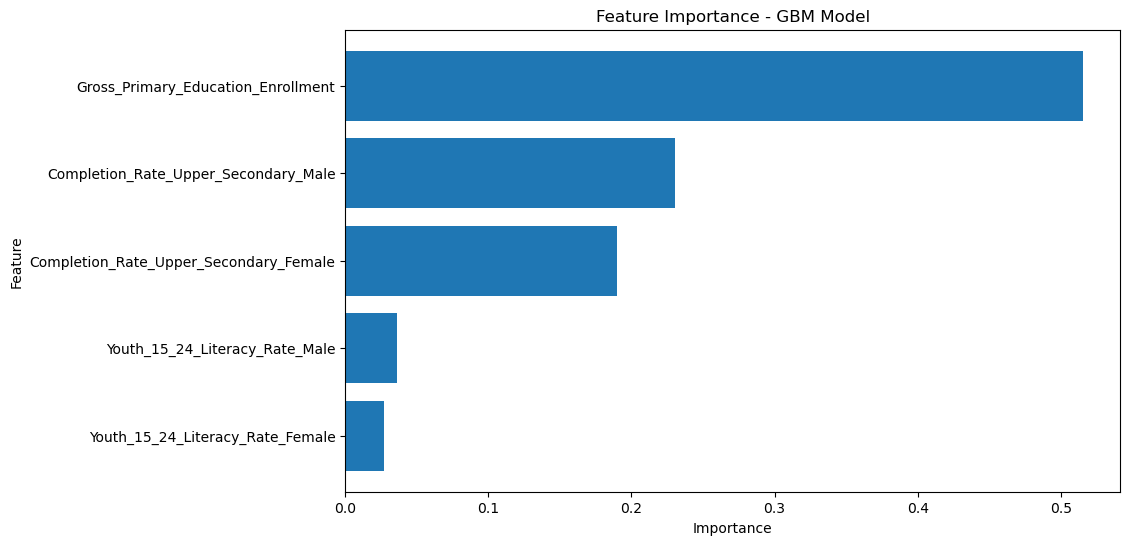

MSE: 741.5943672461029
R-squared: 0.1811901922719743


In [45]:
# Define features and target
features = ['Completion_Rate_Upper_Secondary_Male', 'Completion_Rate_Upper_Secondary_Female',
            'Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female',
            'Gross_Primary_Education_Enrollment']
target = 'Gross_Tertiary_Education_Enrollment'

# Prepare the data
X = data[features]
y = data[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Regressor
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = gbm_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Feature Importance
feature_importances = gbm_model.feature_importances_
sorted_idx = feature_importances.argsort()

# Plotting the Feature Importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.title('Feature Importance - GBM Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

print("MSE:", mse)
print("R-squared:", r2)


In [53]:
# Check if there is a 'region_code' or similar column in the dataset
columns = filtered_data.columns
display(columns)


Index(['Countries and areas', 'Latitude ', 'Longitude',
       'OOSR_Pre0Primary_Age_Male', 'OOSR_Pre0Primary_Age_Female',
       'OOSR_Primary_Age_Male', 'OOSR_Primary_Age_Female',
       'OOSR_Lower_Secondary_Age_Male', 'OOSR_Lower_Secondary_Age_Female',
       'OOSR_Upper_Secondary_Age_Male', 'OOSR_Upper_Secondary_Age_Female',
       'Completion_Rate_Primary_Male', 'Completion_Rate_Primary_Female',
       'Completion_Rate_Lower_Secondary_Male',
       'Completion_Rate_Lower_Secondary_Female',
       'Completion_Rate_Upper_Secondary_Male',
       'Completion_Rate_Upper_Secondary_Female',
       'Grade_2_3_Proficiency_Reading', 'Grade_2_3_Proficiency_Math',
       'Lower_Secondary_End_Proficiency_Reading',
       'Lower_Secondary_End_Proficiency_Math',
       'Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female',
       'Birth_Rate', 'Gross_Primary_Education_Enrollment',
       'Gross_Tertiary_Education_Enrollment', 'Unemployment_Rate', 'Region'],
      dtype='object')

In [46]:
# Simplified regional classification
region_mapping = {
    'Afghanistan': 'Asia',
    'Albania': 'Europe',
    'Algeria': 'Africa',
    'Andorra': 'Europe',
    'Angola': 'Africa',
    'Argentina': 'South America',
    'Armenia': 'Asia',
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Azerbaijan': 'Asia',
    'Bahamas': 'North America',
    'Bahrain': 'Asia',
    'Bangladesh': 'Asia',
    'Barbados': 'North America',
    'Belarus': 'Europe',
    'Belgium': 'Europe',
    'Belize': 'North America',
    'Benin': 'Africa',
    'Bhutan': 'Asia',
    'Bolivia': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Brazil': 'South America',
    'Brunei': 'Asia',
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Burundi': 'Africa',
    'Cabo Verde': 'Africa',
    'Cambodia': 'Asia',
    'Cameroon': 'Africa',
    'Canada': 'North America',
    'Central African Republic': 'Africa',
    'Chad': 'Africa',
    'Chile': 'South America',
    'China': 'Asia',
    'Colombia': 'South America',
    'Comoros': 'Africa',
    'Congo, Dem. Rep.': 'Africa',
    'Congo, Rep.': 'Africa',
    'Costa Rica': 'North America',
    'Croatia': 'Europe',
    'Cuba': 'North America',
    'Cyprus': 'Europe',
    'Czech Republic': 'Europe',
    'Denmark': 'Europe',
    'Djibouti': 'Africa',
    'Dominican Republic': 'North America',
    'Ecuador': 'South America',
    'Egypt': 'Africa',
    'El Salvador': 'North America',
    'Equatorial Guinea': 'Africa',
    'Eritrea': 'Africa',
    'Estonia': 'Europe',
    'Eswatini': 'Africa',
    'Ethiopia': 'Africa',
    'Fiji': 'Oceania',
    'Finland': 'Europe',
    'France': 'Europe',
    'Gabon': 'Africa',
    'Gambia': 'Africa',
    'Georgia': 'Asia',
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Greece': 'Europe',
    'Grenada': 'North America',
    'Guatemala': 'North America',
    'Guinea': 'Africa',
    'Guinea-Bissau': 'Africa',
    'Guyana': 'South America',
    'Haiti': 'North America',
    'Honduras': 'North America',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Iran': 'Asia',
    'Iraq': 'Asia',
    'Ireland': 'Europe',
    'Israel': 'Asia',
    'Italy': 'Europe',
    'Jamaica': 'North America',
    'Japan': 'Asia',
    'Jordan': 'Asia',
    'Kazakhstan': 'Asia',
    'Kenya': 'Africa',
    'Kiribati': 'Oceania',
    'Kuwait': 'Asia',
    'Kyrgyzstan': 'Asia',
    'Laos': 'Asia',
    'Latvia': 'Europe',
    'Lebanon': 'Asia',
    'Lesotho': 'Africa',
    'Liberia': 'Africa',
    'Libya': 'Africa',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Madagascar': 'Africa',
    'Malawi': 'Africa',
    'Malaysia': 'Asia',
    'Maldives': 'Asia',
    'Mali': 'Africa',
    'Malta': 'Europe',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mexico': 'North America',
    'Moldova': 'Europe',
    'Monaco': 'Europe',
    'Mongolia': 'Asia',
    'Montenegro': 'Europe',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Myanmar': 'Asia',
    'Namibia': 'Africa',
    'Nepal': 'Asia',
    'Netherlands': 'Europe',
    'New Zealand': 'Oceania',
    'Nicaragua': 'North America',
    'Niger': 'Africa',
    'Nigeria': 'Africa',
    'North Korea': 'Asia',
    'North Macedonia': 'Europe',
    'Norway': 'Europe',
    'Oman': 'Asia',
    'Pakistan': 'Asia',
    'Palau': 'Oceania',
    'Panama': 'North America',
    'Papua New Guinea': 'Oceania',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Qatar': 'Asia',
    'Romania': 'Europe',
    'Russia': 'Europe',
    'Rwanda': 'Africa',
    'Saint Kitts and Nevis': 'North America',
    'Saint Lucia': 'North America',
    'Saint Vincent and the Grenadines': 'North America',
    'Samoa': 'Oceania',
    'San Marino': 'Europe',
    'Sao Tome and Principe': 'Africa',
    'Saudi Arabia': 'Asia',
    'Senegal': 'Africa',
    'Serbia': 'Europe',
    'Seychelles': 'Africa',
    'Sierra Leone': 'Africa',
    'Singapore': 'Asia',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'Solomon Islands': 'Oceania',
    'Somalia': 'Africa',
    'South Africa': 'Africa',
    'South Korea': 'Asia',
    'South Sudan': 'Africa',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'Sudan': 'Africa',
    'Suriname': 'South America',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Syria': 'Asia',
    'Taiwan': 'Asia',
    'Tajikistan': 'Asia',
    'Tanzania': 'Africa',
    'Thailand': 'Asia',
    'Timor-Leste': 'Asia',
    'Togo': 'Africa',
    'Tonga': 'Oceania',
    'Trinidad and Tobago': 'North America',
    'Tunisia': 'Africa',
    'Turkey': 'Asia',
    'Turkmenistan': 'Asia',
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'United Arab Emirates': 'Asia',
    'United Kingdom': 'Europe',
    'United States': 'North America',
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia',
    'Vanuatu': 'Oceania',
    'Venezuela': 'South America',
    'Vietnam': 'Asia',
    'Yemen': 'Asia',
    'Zambia': 'Africa',
    'Zimbabwe': 'Africa'
}


In [47]:
# Apply region mapping
filtered_data['Region'] = filtered_data['Countries and areas'].map(region_mapping)

# Group by region and calculate key metrics
regional_analysis = filtered_data.groupby('Region').agg({
    'Youth_15_24_Literacy_Rate_Male': ['mean', 'std'],
    'Youth_15_24_Literacy_Rate_Female': ['mean', 'std'],
    'Birth_Rate': ['mean', 'std'],
    'Gross_Primary_Education_Enrollment': ['mean', 'std'],
    'Gross_Tertiary_Education_Enrollment': ['mean', 'std'],
    'Unemployment_Rate': ['mean', 'std']
}).reset_index()

display(regional_analysis)


Region Youth_15_24_Literacy_Rate_Male             \
                                           mean        std   
0         Africa                      80.461538  16.270786   
1           Asia                      97.190476   5.741246   
2         Europe                      99.583333   0.514929   
3  North America                      98.000000   1.732051   
4        Oceania                      98.000000   1.732051   
5  South America                      98.857143   0.377964   

  Youth_15_24_Literacy_Rate_Female            Birth_Rate            \
                              mean        std       mean       std   
0                        75.807692  22.373233  30.660769  9.843053   
1                        96.285714   9.649574  18.271905  5.638788   
2                        99.750000   0.452267   9.359167  1.708090   
3                        98.800000   0.836660  18.080000  2.754623   
4                        98.666667   1.527525  26.093333  3.037126   
5                        99.000000   0.577350  16.677143  2.553760   

  Gross_Primary_Education_Enrollment             \
                                mean        std   
0                          98.261538  28.153594   
1                         104.471429  11.288540   
2                         101.516667   5.938447   
3                          99.960000   9.235421   
4                         112.033333   3.743439   
5                         109.742857   3.951733   

  Gross_Tertiary_Education_Enrollment            Unemployment_Rate            
                                 mean        std              mean       std  
0                           12.346154  12.682468          6.500385  5.770286  
1                           38.033333  19.425713          4.950476  3.401815  
2                           72.166667  26.035896          8.148333  5.386915  
3                           39.760000  12.190488          5.734000  3.495687  
4                            6.233333   1.457166          4.623333  3.625636  
5                           53.942857  25.023246          7.965714  3.052878

C:\Users\twish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\twish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\twish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\twish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

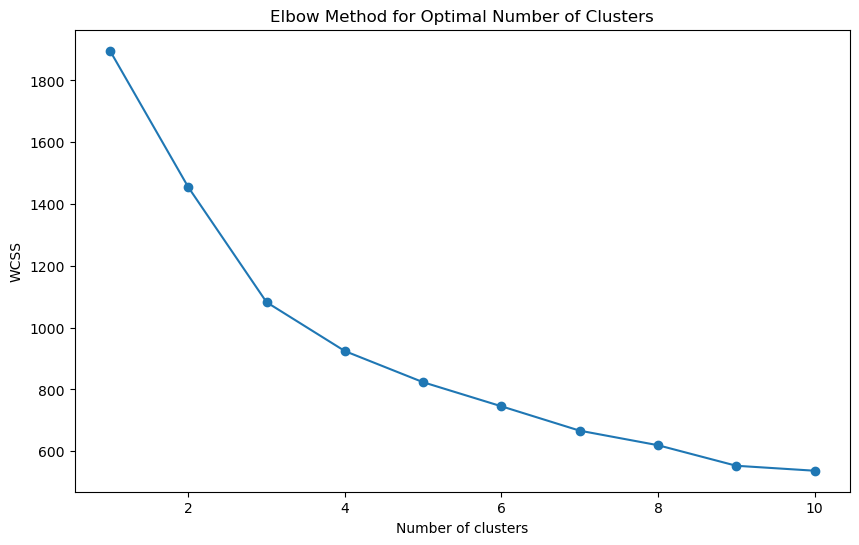

In [48]:
# Select features for clustering (excluding target variables and non-numeric columns)
clustering_features = filtered_data.drop(columns=['Countries and areas', 'Region', 'Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female'])

# Normalize the clustering features
clustering_features_scaled = scaler.fit_transform(clustering_features)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(clustering_features_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph to find the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [49]:
# Prepare the data for predictive modeling
# We'll use the cluster labels and other socio-economic factors as features
predictive_features = filtered_data.drop(columns=['Countries and areas', 'Region', 'Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female'])
target_male = filtered_data['Youth_15_24_Literacy_Rate_Male']
target_female = filtered_data['Youth_15_24_Literacy_Rate_Female']

# Split the data into training and testing sets for male literacy rate prediction
X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(predictive_features, target_male, test_size=0.2, random_state=42)

# Split the data into training and testing sets for female literacy rate prediction
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(predictive_features, target_female, test_size=0.2, random_state=42)

# Train Linear Regression models for male and female literacy rates
model_male = LinearRegression()
model_male.fit(X_train_male, y_train_male)

model_female = LinearRegression()
model_female.fit(X_train_female, y_train_female)

# Make predictions
predictions_male = model_male.predict(X_test_male)
predictions_female = model_female.predict(X_test_female)

# Evaluate model performance for male literacy rate
mae_male = mean_absolute_error(y_test_male, predictions_male)
mse_male = mean_squared_error(y_test_male, predictions_male)
r2_male = r2_score(y_test_male, predictions_male)

# Evaluate model performance for female literacy rate
mae_female = mean_absolute_error(y_test_female, predictions_female)
mse_female = mean_squared_error(y_test_female, predictions_female)
r2_female = r2_score(y_test_female, predictions_female)

predictive_model_performance = {
    "Male Literacy Rate": {
        "MAE": mae_male,
        "MSE": mse_male,
        "R2 Score": r2_male
    },
    "Female Literacy Rate": {
        "MAE": mae_female,
        "MSE": mse_female,
        "R2 Score": r2_female
    }
}

display(pd.DataFrame(predictive_model_performance))
# Prepare the data for predictive modeling
# We'll use the cluster labels and other socio-economic factors as features
predictive_features = filtered_data.drop(columns=['Countries and areas', 'Region', 'Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female'])
target_male = filtered_data['Youth_15_24_Literacy_Rate_Male']
target_female = filtered_data['Youth_15_24_Literacy_Rate_Female']

# Split the data into training and testing sets for male literacy rate prediction
X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(predictive_features, target_male, test_size=0.2, random_state=42)

# Split the data into training and testing sets for female literacy rate prediction
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(predictive_features, target_female, test_size=0.2, random_state=42)

# Train Linear Regression models for male and female literacy rates
model_male = LinearRegression()
model_male.fit(X_train_male, y_train_male)

model_female = LinearRegression()
model_female.fit(X_train_female, y_train_female)

# Make predictions
predictions_male = model_male.predict(X_test_male)
predictions_female = model_female.predict(X_test_female)

# Evaluate model performance for male literacy rate
mae_male = mean_absolute_error(y_test_male, predictions_male)
mse_male = mean_squared_error(y_test_male, predictions_male)
r2_male = r2_score(y_test_male, predictions_male)

# Evaluate model performance for female literacy rate
mae_female = mean_absolute_error(y_test_female, predictions_female)
mse_female = mean_squared_error(y_test_female, predictions_female)
r2_female = r2_score(y_test_female, predictions_female)

predictive_model_performance = {
    "Male Literacy Rate": {
        "MAE": mae_male,
        "MSE": mse_male,
        "R2 Score": r2_male
    },
    "Female Literacy Rate": {
        "MAE": mae_female,
        "MSE": mse_female,
        "R2 Score": r2_female
    }
}

display(pd.DataFrame(predictive_model_performance))


,Male Literacy Rate,Female Literacy Rate
MAE,8.432768,9.508036
MSE,165.866816,242.908725
R2 Score,0.398488,0.519454


,Male Literacy Rate,Female Literacy Rate
MAE,8.432768,9.508036
MSE,165.866816,242.908725
R2 Score,0.398488,0.519454


In [51]:
# Define a function to plot clusters
def plot_clusters(data, x_feature, y_feature, cluster_label, title):
    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        x=data[x_feature],
        y=data[y_feature],
        hue=data[cluster_label],
        palette=sns.color_palette("hsv", len(data[cluster_label].unique())),
        legend="full"
    )
    plt.title(title)
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.legend(title=cluster_label)
    plt.show()

In [54]:
# Visualize the regional clusters for Africa
plot_clusters(filtered_data[filtered_data['Region'] == 'Africa'], 'Gross_Primary_Education_Enrollment', 'Gross_Tertiary_Education_Enrollment', 'Cluster', 'Africa: Primary vs Tertiary Education Enrollment Clusters')


KeyError: 'Cluster'

<Figure size 1200x800 with 0 Axes>

In [56]:
# Analyze key metrics by cluster within each region
def analyze_clusters(region):
    cluster_analysis = filtered_data[filtered_data['Region'] == region].groupby('Cluster').agg({
        'Youth_15_24_Literacy_Rate_Male': ['mean', 'std'],
        'Youth_15_24_Literacy_Rate_Female': ['mean', 'std'],
        'Birth_Rate': ['mean', 'std'],
        'Gross_Primary_Education_Enrollment': ['mean', 'std'],
        'Gross_Tertiary_Education_Enrollment': ['mean', 'std'],
        'Unemployment_Rate': ['mean', 'std']
    }).reset_index()
    return cluster_analysis


In [57]:
# Perform cluster analysis for each region
cluster_analysis_africa = analyze_clusters('Africa')
cluster_analysis_asia = analyze_clusters('Asia')
cluster_analysis_europe = analyze_clusters('Europe')
cluster_analysis_north_america = analyze_clusters('North America')
cluster_analysis_oceania = analyze_clusters('Oceania')
cluster_analysis_south_america = analyze_clusters('South America')

display(cluster_analysis_africa)
display(cluster_analysis_asia)
display(cluster_analysis_europe)
display(cluster_analysis_north_america)
display(cluster_analysis_oceania)
display(cluster_analysis_south_america)


KeyError: 'Cluster'